In [1]:
from ACO import *
from Evaporator import *
from Initializer import *
from Intensifier import *
from Problem import VehicleRoutingProblem
from SolutionGenerator import *
from Heuristics import TSPHeuristic
from Terminator import *
from EvolutionPlotter import plot_evolution

In [2]:
import numbers
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
def plot_heatmap(x, y, z, x_label, y_label, title):
    ax = sns.heatmap(z, linewidth=0.5)
    ax.set_title(title)
    ax.set_xticks(np.arange(len(x)))
    ax.set_yticks(np.arange(len(y)))
    if isinstance(x, numbers.Number): x = np.round(x,2)
    ax.set_xticklabels(x)
    if isinstance(y, numbers.Number): y = np.round(y,2)
    ax.set_yticklabels(np.flip(y,axis=0))
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    plt.show()

## Hyperparameters: rho vs. delta values

In [4]:
problem = VehicleRoutingProblem(problem=1)
initializer = VRP_Initializer()
heuristic = TSPHeuristic
solution_gen = VRPSolutionGenerator(number_of_ants=10, alpha=1, beta=3, heuristic=heuristic, problem=problem)

In [23]:
rho_values = np.arange(0.04, 0.2, 0.04)
delta_values = np.arange(0.04, 0.2, 0.04)

runs_per_config = 3
best_scores = np.zeros(shape=(rho_values.shape[0], delta_values.shape[0], runs_per_config))
runtimes = np.zeros(shape=best_scores.shape)

for i, rho in enumerate(rho_values):
    for j, delta in enumerate(delta_values):
        evaporator = Evaporator(rho=rho)
        intensifier = Intensifier(delta=delta)
        for k in range(runs_per_config):
            terminator = [maxItTerminator(maxIt=100), convergenceTerminator(maxIter=20)]
            aco = AntColonyOptimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 1, True, False)
            startTime = time.time()
            solutions, scores = aco.run()
            runtimes[i,j,k] = time.time() - startTime
            best_scores[i,j,k] = aco.best_score
        print('rho: %f, delta: %f, score - mean / std: %d / %d, runtime - mean / std: %04.1f / %04.2f'
              % (rho, delta, np.mean(best_scores[i,j]), np.std(best_scores[i,j]), np.mean(runtimes[i,j]), np.std(runtimes[i,j])))

rho: 0.040000, delta: 0.040000, score - mean / std: 70262 / 994, runtime - mean / std: 09.1 / 0.92
rho: 0.040000, delta: 0.080000, score - mean / std: 68872 / 1095, runtime - mean / std: 07.8 / 0.47
rho: 0.040000, delta: 0.120000, score - mean / std: 69877 / 1512, runtime - mean / std: 07.3 / 0.54
rho: 0.040000, delta: 0.160000, score - mean / std: 70468 / 2565, runtime - mean / std: 05.9 / 0.36
rho: 0.080000, delta: 0.040000, score - mean / std: 68869 / 1347, runtime - mean / std: 07.7 / 0.65
rho: 0.080000, delta: 0.080000, score - mean / std: 66817 / 1656, runtime - mean / std: 07.0 / 0.52
rho: 0.080000, delta: 0.120000, score - mean / std: 69979 / 2345, runtime - mean / std: 06.5 / 0.38
rho: 0.080000, delta: 0.160000, score - mean / std: 68038 / 916, runtime - mean / std: 05.9 / 0.38
rho: 0.120000, delta: 0.040000, score - mean / std: 68290 / 613, runtime - mean / std: 08.1 / 0.16
rho: 0.120000, delta: 0.080000, score - mean / std: 71832 / 71, runtime - mean / std: 06.7 / 0.31
rho: 

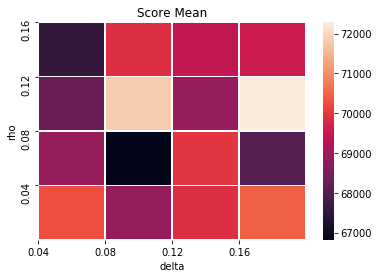

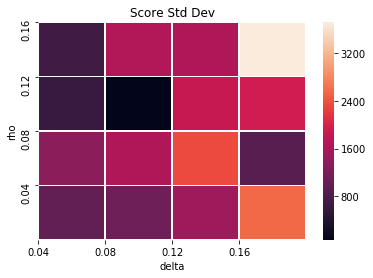

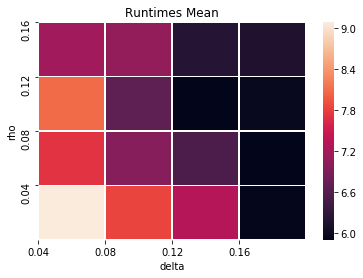

In [30]:
plot_heatmap(delta_values, rho_values, np.flip(np.mean(best_scores, axis=2),axis=0), 'delta', 'rho', 'Score Mean')
plot_heatmap(delta_values, rho_values, np.flip(np.std(best_scores, axis=2),axis=0), 'delta', 'rho', 'Score Std Dev')
plot_heatmap(delta_values, rho_values, np.flip(np.mean(runtimes, axis=2),axis=0), 'delta', 'rho', 'Runtimes Mean')

## Hyperparameters: ants vs. rho / delta values

In [31]:
problem = VehicleRoutingProblem(problem=1)
initializer = VRP_Initializer()
heuristic = TSPHeuristic

In [33]:
update_values = np.arange(0.04, 0.2, 0.04)
numbers_of_ants = np.array([1, 5, 10 ,15])

runs_per_config = 3
best_scores = np.zeros(shape=(update_values.shape[0], numbers_of_ants.shape[0], runs_per_config))
runtimes = np.zeros(shape=best_scores.shape)

for i, update_value in enumerate(update_values):
    for j, ants in enumerate(numbers_of_ants):
        evaporator = Evaporator(rho=update_value)
        intensifier = Intensifier(delta=update_value)
        solution_gen = VRPSolutionGenerator(number_of_ants=ants, alpha=1, beta=3, heuristic=heuristic, problem=problem)
        for k in range(runs_per_config):
            terminator = [maxItTerminator(maxIt=100), convergenceTerminator(maxIter=20)]
            aco = AntColonyOptimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 1, True, False)
            startTime = time.time()
            solutions, scores = aco.run()
            runtimes[i,j,k] = time.time() - startTime
            best_scores[i,j,k] = aco.best_score
        print('ants: %d, rho / delta: %f, score - mean / std: %d / %d, runtime - mean / std: %04.1f / %04.2f'
              % (ants, update_value, np.mean(best_scores[i,j]), np.std(best_scores[i,j]),
                 np.mean(runtimes[i,j]), np.std(runtimes[i,j])))

ants: 1, rho / delta: 0.040000, score - mean / std: 92325 / 3506, runtime - mean / std: 14.6 / 0.46
ants: 5, rho / delta: 0.040000, score - mean / std: 87712 / 1029, runtime - mean / std: 19.0 / 0.38
ants: 10, rho / delta: 0.040000, score - mean / std: 87125 / 1859, runtime - mean / std: 24.5 / 0.14
ants: 15, rho / delta: 0.040000, score - mean / std: 84755 / 2403, runtime - mean / std: 30.0 / 0.59
ants: 1, rho / delta: 0.080000, score - mean / std: 85725 / 2261, runtime - mean / std: 13.9 / 0.03
ants: 5, rho / delta: 0.080000, score - mean / std: 85186 / 2083, runtime - mean / std: 18.3 / 0.04
ants: 10, rho / delta: 0.080000, score - mean / std: 80453 / 3249, runtime - mean / std: 23.9 / 0.11
ants: 15, rho / delta: 0.080000, score - mean / std: 82111 / 2059, runtime - mean / std: 29.3 / 0.40
ants: 1, rho / delta: 0.120000, score - mean / std: 90969 / 1637, runtime - mean / std: 12.7 / 0.11
ants: 5, rho / delta: 0.120000, score - mean / std: 84548 / 5354, runtime - mean / std: 15.2 / 1

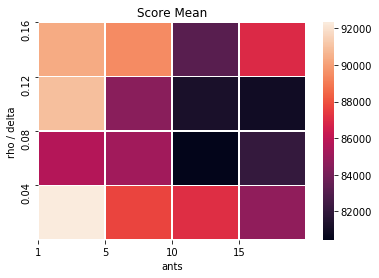

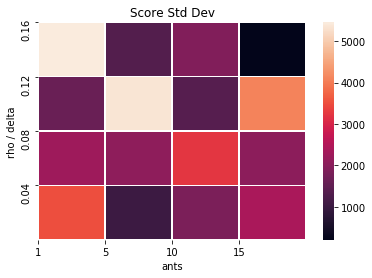

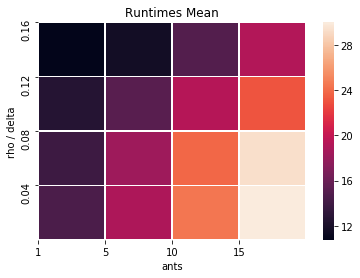

In [34]:
plot_heatmap(numbers_of_ants, update_values, np.flip(np.mean(best_scores, axis=2),axis=0), 'ants', 'rho / delta', 'Score Mean')
plot_heatmap(numbers_of_ants, update_values, np.flip(np.std(best_scores, axis=2),axis=0), 'ants', 'rho / delta', 'Score Std Dev')
plot_heatmap(numbers_of_ants, update_values, np.flip(np.mean(runtimes, axis=2),axis=0), 'ants', 'rho / delta', 'Runtimes Mean')

## Hyperparameters: ants vs. considered number of solutions

In [35]:
problem = VehicleRoutingProblem(problem=1)
initializer = VRP_Initializer()
evaporator = Evaporator(rho=0.05)
intensifier = Intensifier(delta=0.05)
heuristic = TSPHeuristic

In [36]:
numbers_of_solutions = np.array([1, 2, 3])
numbers_of_ants = np.array([5, 10 ,15])

runs_per_config = 3
best_scores = np.zeros(shape=(numbers_of_solutions.shape[0], numbers_of_ants.shape[0], runs_per_config))
runtimes = np.zeros(shape=best_scores.shape)

for i, number_of_solutions in enumerate(numbers_of_solutions):
    for j, ants in enumerate(numbers_of_ants):
        solution_gen = VRPSolutionGenerator(number_of_ants=ants, alpha=1, beta=3, heuristic=heuristic, problem=problem)
        for k in range(runs_per_config):
            terminator = [maxItTerminator(maxIt=100), convergenceTerminator(maxIter=20)]
            aco = AntColonyOptimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator,
                                       number_of_solutions, True, False)
            startTime = time.time()
            solutions, scores = aco.run()
            runtimes[i,j,k] = time.time() - startTime
            best_scores[i,j,k] = aco.best_score
        print('ants: %d, considered solutions: %d, score - mean / std: %d / %d, runtime - mean / std: %04.1f / %04.2f'
              % (ants, number_of_solutions, np.mean(best_scores[i,j]), np.std(best_scores[i,j]),
                 np.mean(runtimes[i,j]), np.std(runtimes[i,j])))

ants: 5, considered solutions: 1, score - mean / std: 87071 / 1077, runtime - mean / std: 18.7 / 0.48
ants: 10, considered solutions: 1, score - mean / std: 87331 / 2332, runtime - mean / std: 23.8 / 0.05
ants: 15, considered solutions: 1, score - mean / std: 83996 / 3545, runtime - mean / std: 29.5 / 0.16
ants: 5, considered solutions: 2, score - mean / std: 82004 / 1045, runtime - mean / std: 26.6 / 0.03
ants: 10, considered solutions: 2, score - mean / std: 81427 / 2907, runtime - mean / std: 32.1 / 0.04
ants: 15, considered solutions: 2, score - mean / std: 78736 / 2871, runtime - mean / std: 38.0 / 0.36
ants: 5, considered solutions: 3, score - mean / std: 81560 / 1657, runtime - mean / std: 34.8 / 0.04
ants: 10, considered solutions: 3, score - mean / std: 78964 / 1949, runtime - mean / std: 39.7 / 0.26
ants: 15, considered solutions: 3, score - mean / std: 79448 / 2049, runtime - mean / std: 44.9 / 0.02


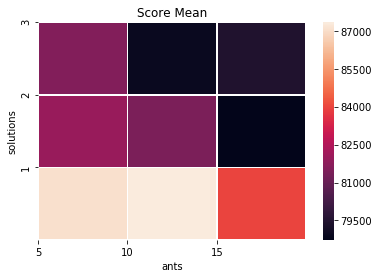

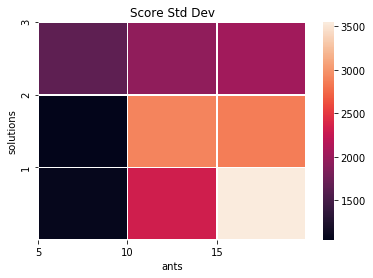

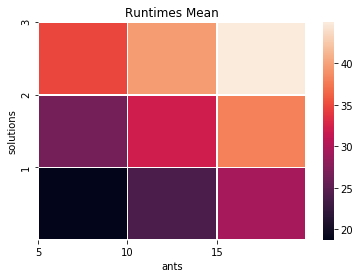

In [37]:
plot_heatmap(numbers_of_ants, numbers_of_solutions, np.flip(np.mean(best_scores, axis=2),axis=0), 'ants', 'solutions', 'Score Mean')
plot_heatmap(numbers_of_ants, numbers_of_solutions, np.flip(np.std(best_scores, axis=2),axis=0), 'ants', 'solutions', 'Score Std Dev')
plot_heatmap(numbers_of_ants, numbers_of_solutions, np.flip(np.mean(runtimes, axis=2),axis=0), 'ants', 'solutions', 'Runtimes Mean')

## Hyperparameters: with vs. without distance heuristic

In [38]:
problem = VehicleRoutingProblem(problem=1)
initializer = VRP_Initializer()
evaporator = Evaporator(rho=0.05)
intensifier = Intensifier(delta=0.05)
heuristic = TSPHeuristic

In [39]:
heuristics = [TSPHeuristic, None]
numbers_of_ants = np.array([1, 5, 10 ,15])

runs_per_config = 3
best_scores = np.zeros(shape=(len(heuristics), numbers_of_ants.shape[0], runs_per_config))
runtimes = np.zeros(shape=best_scores.shape)

for i, heuristic in enumerate(heuristics):
    for j, ants in enumerate(numbers_of_ants):
        solution_gen = VRPSolutionGenerator(number_of_ants=ants, alpha=1, beta=3, heuristic=heuristic, problem=problem)
        for k in range(runs_per_config):
            terminator = [maxItTerminator(maxIt=100), convergenceTerminator(maxIter=20)]
            aco = AntColonyOptimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 1, True, False)
            startTime = time.time()
            solutions, scores = aco.run()
            runtimes[i,j,k] = time.time() - startTime
            best_scores[i,j,k] = aco.best_score
        print('ants: %d, heuristic: %s, score-mean/std: %d / %d, runtime-mean/std: %04.1f / %04.2f'
              % (ants, heuristic, np.mean(best_scores[i,j]), np.std(best_scores[i,j]),
                 np.mean(runtimes[i,j]), np.std(runtimes[i,j])))

ants: 1, heuristic: <class 'Heuristics.TSPHeuristic'>, score-mean/std: 89532 / 3610, runtime-mean/std: 13.4 / 0.03
ants: 5, heuristic: <class 'Heuristics.TSPHeuristic'>, score-mean/std: 89109 / 2248, runtime-mean/std: 17.8 / 0.02
ants: 10, heuristic: <class 'Heuristics.TSPHeuristic'>, score-mean/std: 85746 / 1206, runtime-mean/std: 23.3 / 0.11
ants: 15, heuristic: <class 'Heuristics.TSPHeuristic'>, score-mean/std: 85180 / 3760, runtime-mean/std: 29.0 / 0.02
ants: 1, heuristic: None, score-mean/std: 273561 / 1970, runtime-mean/std: 13.3 / 0.02
ants: 5, heuristic: None, score-mean/std: 263933 / 9076, runtime-mean/std: 17.4 / 0.04
ants: 10, heuristic: None, score-mean/std: 256217 / 3442, runtime-mean/std: 23.2 / 0.27
ants: 15, heuristic: None, score-mean/std: 259378 / 4611, runtime-mean/std: 28.9 / 0.18


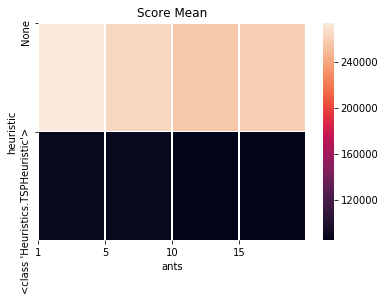

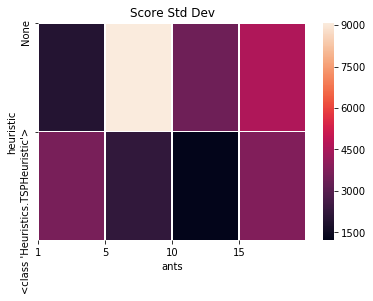

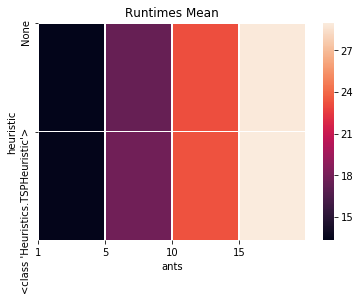

In [40]:
plot_heatmap(numbers_of_ants, heuristics, np.flip(np.mean(best_scores, axis=2),axis=0), 'ants', 'heuristic', 'Score Mean')
plot_heatmap(numbers_of_ants, heuristics, np.flip(np.std(best_scores, axis=2),axis=0), 'ants', 'heuristic', 'Score Std Dev')
plot_heatmap(numbers_of_ants, heuristics, np.flip(np.mean(runtimes, axis=2),axis=0), 'ants', 'heuristic', 'Runtimes Mean')

## Hyperparameters: alpha / beta weights 

In [41]:
problem = VehicleRoutingProblem(problem=1)
initializer = VRP_Initializer()
evaporator = Evaporator(rho=0.05)
intensifier = Intensifier(delta=0.05)
heuristic = TSPHeuristic

In [42]:
values = np.arange(2, 14, 2)

runs_per_config = 3
best_scores = np.zeros(shape=(values.shape[0], values.shape[0], runs_per_config))
runtimes = np.zeros(shape=best_scores.shape)

for i, alpha in enumerate(values):
    for j, beta in enumerate(values):
        solution_gen = VRPSolutionGenerator(number_of_ants=10, alpha=alpha, beta=beta, heuristic=heuristic, problem=problem)
        for k in range(runs_per_config):
            terminator = [maxItTerminator(maxIt=100), convergenceTerminator(maxIter=20)]
            aco = AntColonyOptimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 1, True, False)
            startTime = time.time()
            solutions, scores = aco.run()
            runtimes[i,j,k] = time.time() - startTime
            best_scores[i,j,k] = aco.best_score
        print('alpha: %d, beta: %s, score - mean / std: %d / %d, runtime - mean / std: %f / %f'
              % (alpha, beta, np.mean(best_scores[i,j]), np.std(best_scores[i,j]),
                 np.mean(runtimes[i,j]), np.std(runtimes[i,j])))

alpha: 2, beta: 2, score - mean / std: 102734 / 10407, runtime - mean / std: 24.575674 / 0.141826
alpha: 2, beta: 4, score - mean / std: 71823 / 1872, runtime - mean / std: 23.662007 / 0.670154
alpha: 2, beta: 6, score - mean / std: 66995 / 1348, runtime - mean / std: 21.146476 / 1.376043
alpha: 2, beta: 8, score - mean / std: 67438 / 1228, runtime - mean / std: 21.629343 / 1.923742
alpha: 2, beta: 10, score - mean / std: 65586 / 578, runtime - mean / std: 19.697491 / 0.958699
alpha: 2, beta: 12, score - mean / std: 64651 / 503, runtime - mean / std: 21.579543 / 2.087235
alpha: 4, beta: 2, score - mean / std: 102935 / 7453, runtime - mean / std: 18.758785 / 0.635835
alpha: 4, beta: 4, score - mean / std: 72687 / 4363, runtime - mean / std: 17.065184 / 0.927855
alpha: 4, beta: 6, score - mean / std: 69880 / 896, runtime - mean / std: 13.797080 / 1.318067
alpha: 4, beta: 8, score - mean / std: 67580 / 1507, runtime - mean / std: 13.729837 / 0.259435
alpha: 4, beta: 10, score - mean / std

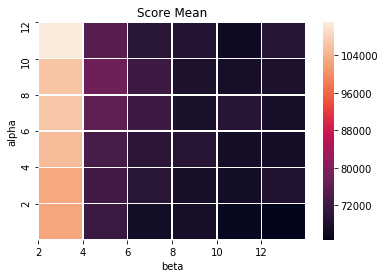

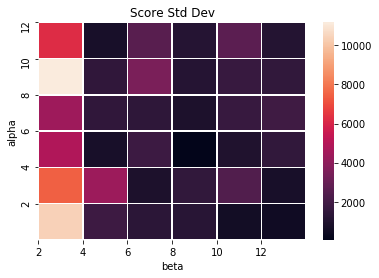

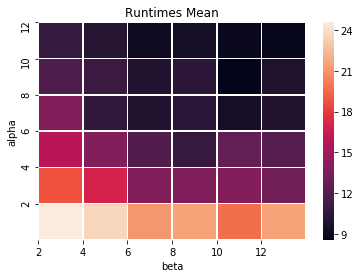

In [43]:
plot_heatmap(values, values, np.flip(np.mean(best_scores, axis=2),axis=0), 'beta', 'alpha', 'Score Mean')
plot_heatmap(values, values, np.flip(np.std(best_scores, axis=2),axis=0), 'beta', 'alpha', 'Score Std Dev')
plot_heatmap(values, values, np.flip(np.mean(runtimes, axis=2),axis=0), 'beta', 'alpha', 'Runtimes Mean')

In [19]:
def print_vehicles(aco):
    zero_vehicles = list()
    selected_vehicles = list()
    best_solution = np.array(aco.best_solution[:,1:])
    for vehicle in range(aco.problem.vehicles):
        if np.sum((best_solution[vehicle] - 1) % aco.problem.get_size()) == 0:
            zero_vehicles.append(vehicle)
        else:
            best_solution[vehicle][best_solution[vehicle] > 0] \
                = (best_solution[vehicle][best_solution[vehicle] > 0] - 1) % aco.problem.get_size()
            selected_vehicles.append(vehicle)
    best_solution = np.delete(best_solution, zero_vehicles, 0)
    print('Selected vehicles: \n' + str(selected_vehicles))
    print('Capacity of Selected vehicles: \n' + str(problem.capacity[selected_vehicles]))
    print('Best solution: \n' + str(best_solution))

## Find ACO solution for problem 1

In [125]:
problem = VehicleRoutingProblem(problem=1)
initializer = VRP_Initializer()
evaporator = Evaporator(rho=0.05)
intensifier = Intensifier(delta=0.075)
heuristic = TSPHeuristic

solution_gen = VRPSolutionGenerator(number_of_ants=100, alpha=2, beta=5, heuristic=heuristic, problem=problem)
terminator = [maxItTerminator(maxIt=200), maxRuntimeTerminator(maxRuntime=120), convergenceTerminator(maxIter=10)]
aco = AntColonyOptimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 3, True, False)

startTime = time.time()
solutions_1, scores_1 = aco.run()
runtime = time.time() - startTime

In [126]:
print('Best score: ', aco.best_score, ' - Runtime: ', runtime)

Best score:  63363  - Runtime:  120.65432381629944


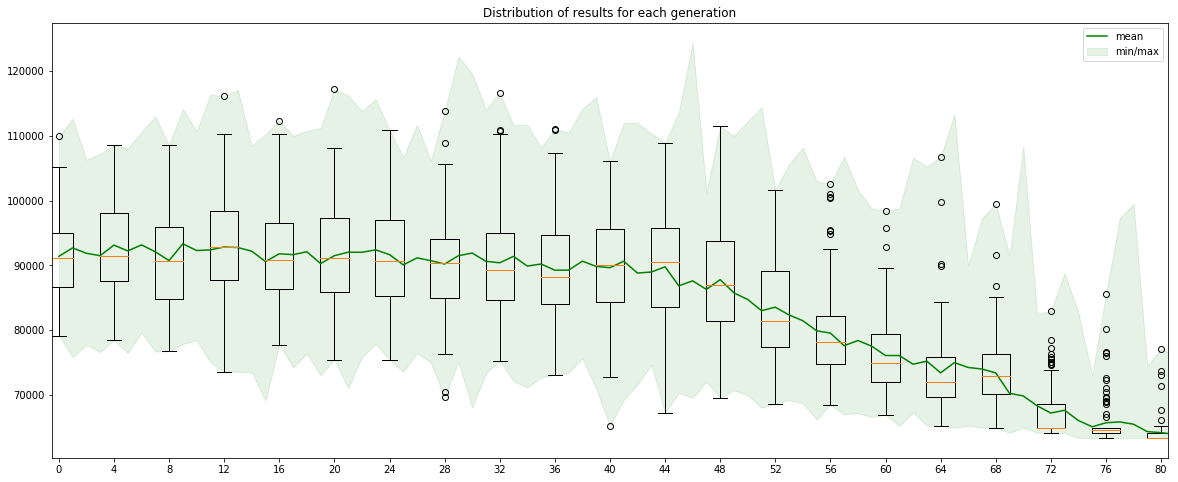

In [127]:
plot_evolution(scores_1, 20)

In [128]:
print_vehicles(aco)

Selected vehicles: 
[13, 14, 20, 27, 32]
Capacity of Selected vehicles: 
[ 100  100  300  500 1000]
Best solution: 
[[  0  10   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0  58   9  55  13  76   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0  26  62   2  66  74  16  63  23  24   5  20 

## Find ACO solution for problem 2

In [129]:
problem = VehicleRoutingProblem(problem=2)
initializer = VRP_Initializer()
evaporator = Evaporator(rho=0.05)
intensifier = Intensifier(delta=0.075)
heuristic = TSPHeuristic

solution_gen = VRPSolutionGenerator(number_of_ants=100, alpha=2, beta=5, heuristic=heuristic, problem=problem)
terminator = [maxItTerminator(maxIt=200), maxRuntimeTerminator(maxRuntime=120), convergenceTerminator(maxIter=10)]
aco = AntColonyOptimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 3, True, False)

startTime = time.time()
solutions_2, scores_2 = aco.run()
runtime = time.time() - startTime

In [130]:
print('Best score: ', aco.best_score, ' - Runtime: ', runtime)

Best score:  92752  - Runtime:  99.52232837677002


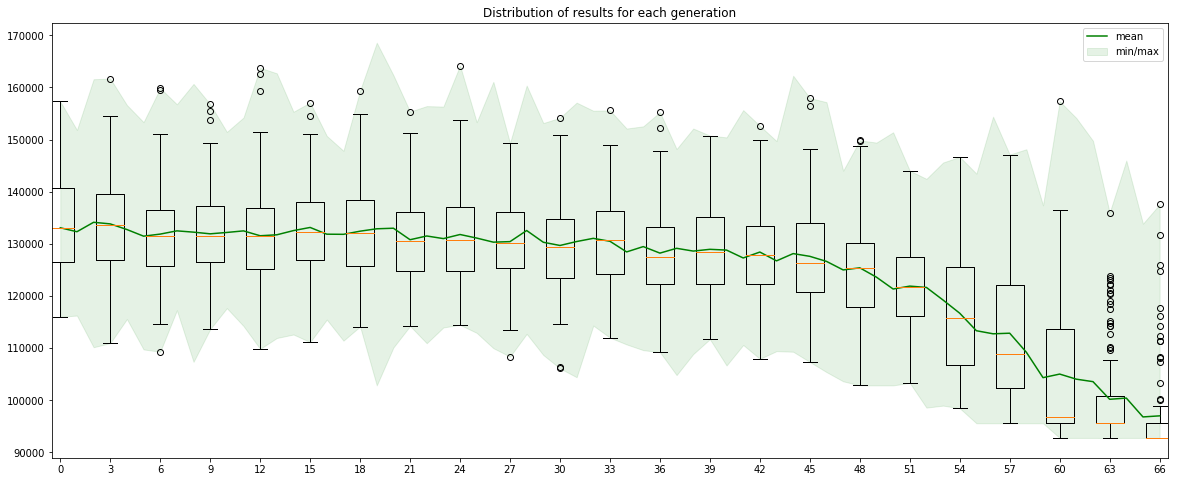

In [131]:
plot_evolution(scores_2, 20)

In [132]:
print_vehicles(aco)

Selected vehicles: 
[2, 18, 20, 21, 22, 24, 25, 26]
Capacity of Selected vehicles: 
[100 100 300 300 300 300 300 300]
Best solution: 
[[  0  57  13  44  53  21   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0  59  48  22  31  78  83  50   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0  40  37  84  33  10  24  7

## Find ACO solution for problem 3

In [89]:
problem = VehicleRoutingProblem(problem=3)
initializer = VRP_Initializer()
evaporator = Evaporator(rho=0.05)
intensifier = Intensifier(delta=0.075)
heuristic = TSPHeuristic

solution_gen = VRPSolutionGenerator(number_of_ants=80, alpha=2, beta=5, heuristic=heuristic, problem=problem)
terminator = [maxItTerminator(maxIt=200), maxRuntimeTerminator(maxRuntime=120), convergenceTerminator(maxIter=10)]
aco = AntColonyOptimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 3, True, False)

startTime = time.time()
solutions_3, scores_3 = aco.run()
runtime = time.time() - startTime

In [90]:
print('Best score: ', aco.best_score, ' - Runtime: ', runtime)

Best score:  42852  - Runtime:  88.10384392738342


In [91]:
print_vehicles(aco)

Selected vehicles: 
[31, 32]
Capacity of Selected vehicles: 
[1000 1000]
Best solution: 
[[  0  58   9  55  13  76  91   7  15  10   1  39 100  94  53  81  95  54
   31  40  35  43  19  38  87  25  14  37  34  80   5  90  65  92  30  11
   93  77  79  45  21  83  17  98  66  36  64  27  26  67  41  28  22  86
    8   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0  62   2  74  24  23  63  16  78  69  46   8  61  89  84  72  97  42
   50  49  88  60  47  57   6  18  70  82  32  56  48  71  96  73  12  68
    3   4  59  29  44  51  99  75  33  85  52  20   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]]


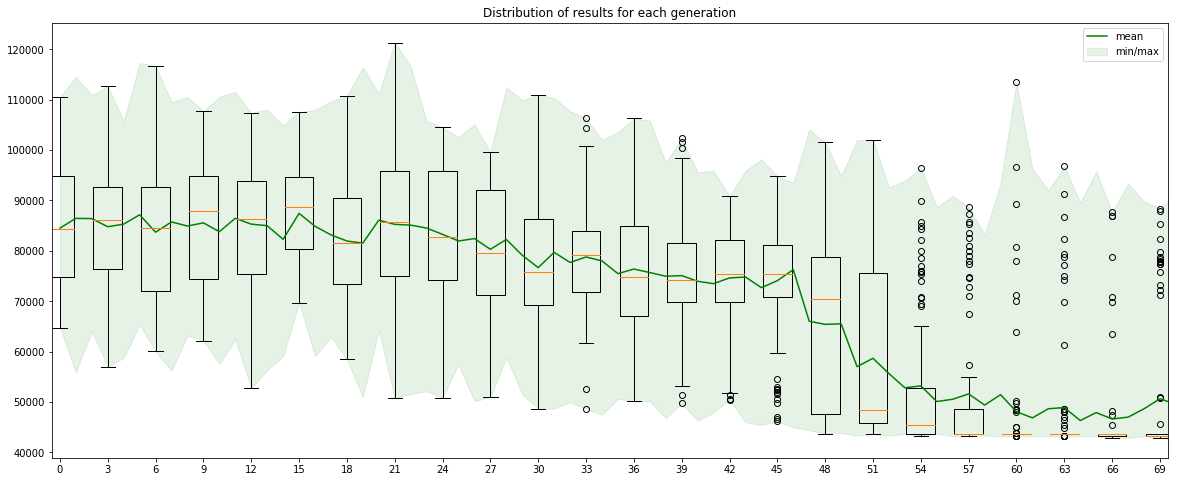

In [92]:
plot_evolution(scores_3, 20)

## Find ACO solution for problem 4

In [93]:
problem = VehicleRoutingProblem(problem=4)
initializer = VRP_Initializer()
evaporator = Evaporator(rho=0.05)
intensifier = Intensifier(delta=0.075)
heuristic = TSPHeuristic

solution_gen = VRPSolutionGenerator(number_of_ants=80, alpha=2, beta=5, heuristic=heuristic, problem=problem)
terminator = [maxItTerminator(maxIt=200), maxRuntimeTerminator(maxRuntime=120), convergenceTerminator(maxIter=10)]
aco = AntColonyOptimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 3, True, False)

startTime = time.time()
solutions_4, scores_4 = aco.run()
runtime = time.time() - startTime

In [94]:
print('Best score: ', aco.best_score, ' - Runtime: ', runtime)

Best score:  57380  - Runtime:  101.19466876983643


In [95]:
print_vehicles(aco)

Selected vehicles: 
[31, 32]
Capacity of Selected vehicles: 
[1000 1000]
Best solution: 
[[  0  40  43   9  39  52  92  50  83  98   3   4  86  34  11  61  90  79
   58  10  72  24   5  33  84  46  74  49  66  87  26  67   7   1  75  36
   64  69   6  71  93  68  82  88  21  53  44  57  13  97  19  28  17   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0  37  29  31  30  42  38  48  22  78  89  59  47  32  35  51  60  23
   17  18  27  14  81  80   8  76  99  55  94  45  12  77   2  62  15  63
   70  25  95  73  20  96  85  54  65  41  91  16 100  56   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]]


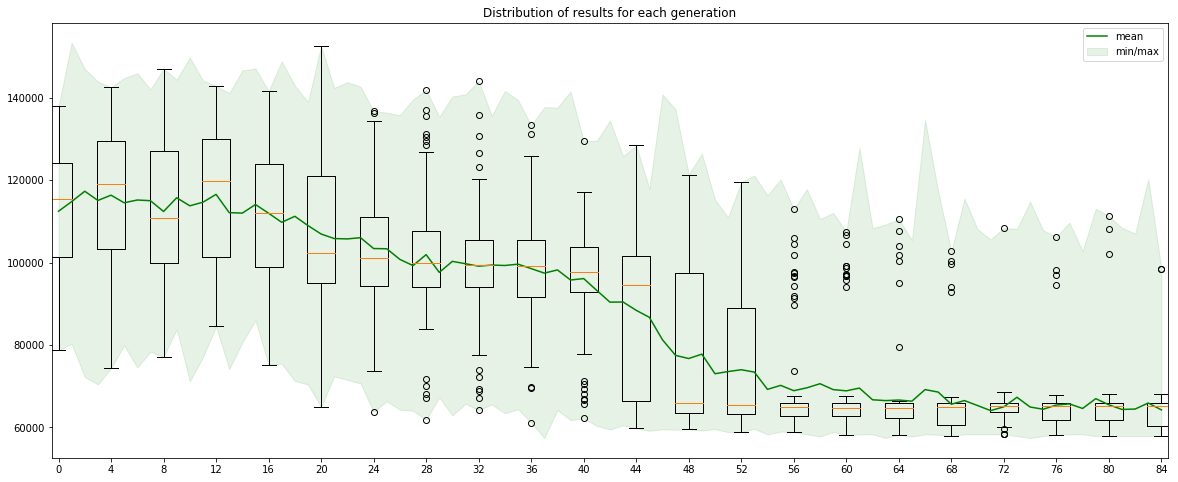

In [96]:
plot_evolution(scores_4, 20)

## Find ACO solution for problem 5

In [97]:
problem = VehicleRoutingProblem(problem=5)
initializer = VRP_Initializer()
evaporator = Evaporator(rho=0.05)
intensifier = Intensifier(delta=0.075)
heuristic = TSPHeuristic

solution_gen = VRPSolutionGenerator(number_of_ants=80, alpha=2, beta=5, heuristic=heuristic, problem=problem)
terminator = [maxItTerminator(maxIt=200), maxRuntimeTerminator(maxRuntime=120), convergenceTerminator(maxIter=10)]
aco = AntColonyOptimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 3, True, False)

startTime = time.time()
solutions_5, scores_5 = aco.run()
runtime = time.time() - startTime

In [98]:
print('Best score: ', aco.best_score, ' - Runtime: ', runtime)

Best score:  35330  - Runtime:  70.58295392990112


In [99]:
print_vehicles(aco)

Selected vehicles: 
[31, 32]
Capacity of Selected vehicles: 
[1000 1000]
Best solution: 
[[  0  55  13  62   2  66  36  64  27  26  67  41  28  22  61  86   8  46
   69  84  72  97  42  50  49  88  60  89  56  32  82  70  57  47   6  18
   71   3  73  68  12  96  93  77   5  20  52  38  53   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0  58   9  94 100  39   1  10  15   7  91  76  81  95  54  31  40  35
   43  24  23  63  16  74  98  17  78  83  21  45  79  48  44  29  59   4
   51  99  75  33  85  11  30  92  90  65  34  80  25  14  37  87  19  38
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]]


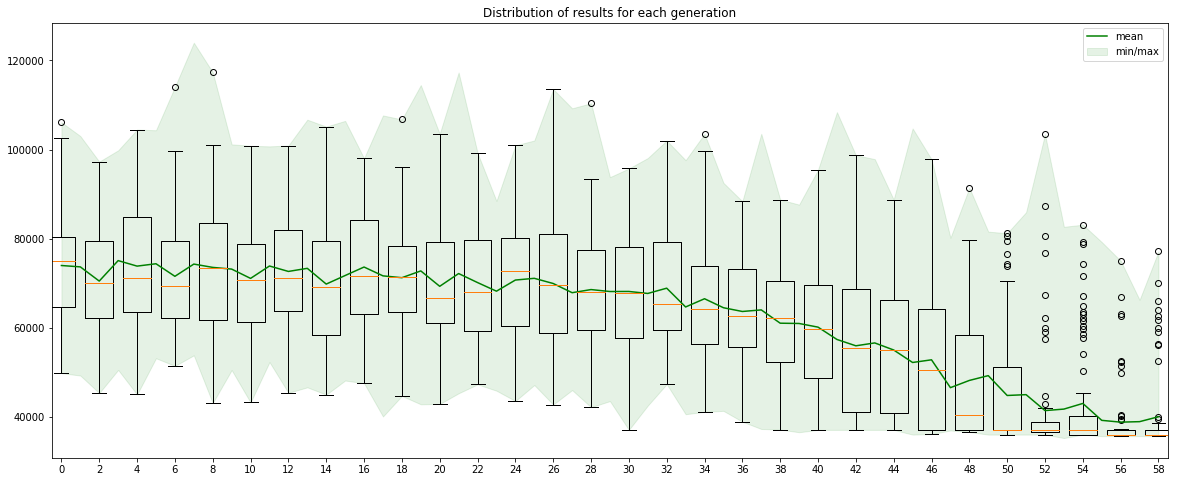

In [100]:
plot_evolution(scores_5, 20)

## Find ACO solution for problem 6

In [101]:
problem = VehicleRoutingProblem(problem=6)
initializer = VRP_Initializer()
evaporator = Evaporator(rho=0.05)
intensifier = Intensifier(delta=0.075)
heuristic = TSPHeuristic

solution_gen = VRPSolutionGenerator(number_of_ants=80, alpha=2, beta=5, heuristic=heuristic, problem=problem)
terminator = [maxItTerminator(maxIt=200), maxRuntimeTerminator(maxRuntime=120), convergenceTerminator(maxIter=10)]
aco = AntColonyOptimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 3, True, False)

startTime = time.time()
solutions_6, scores_6 = aco.run()
runtime = time.time() - startTime

In [102]:
print('Best score: ', aco.best_score, ' - Runtime: ', runtime)

Best score:  59580  - Runtime:  77.79796409606934


In [103]:
print_vehicles(aco)

Selected vehicles: 
[31, 32]
Capacity of Selected vehicles: 
[1000 1000]
Best solution: 
[[  0  40  43   9  39  52  92  50  83  98   3   4  86  11  34  61  90  79
   24  10  72   5  33  84  46  74   1   7  67  26  87  49  66  58  37  29
   31  30  38  42  47  32  35  17  28  60  23  51  80  81  14  27  18  12
   45   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0  13  57  44  53  21  82  88  63  70  25  95  73  20  85  96  54  65
   41  91  16 100  56  36  64  69   6  75  93  71  68  19  97  15  77   2
   62  45  55  94  99   8  76  89  59  48  22  78   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]]


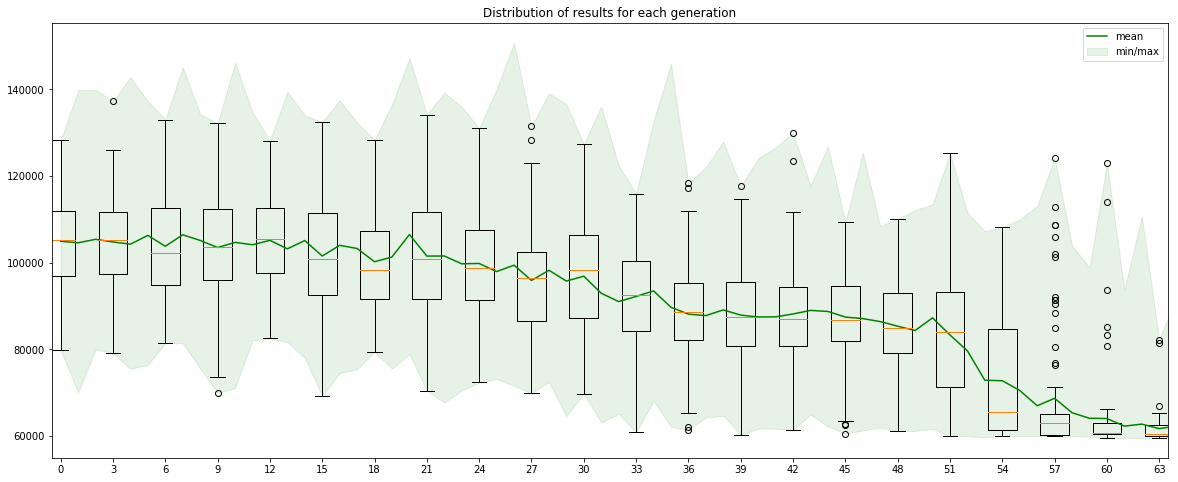

In [104]:
plot_evolution(scores_6, 20)